# Пороговая фильтрация изображения
### Цель: 
Осуществить пороговую фильтрацию изображения для возможности перевода текста
### Выполнение: 
1. Выделение границ изображения
2. Бинаризация изображения

Из методов обнаружения края при помощи различных дифференциальных операторов наиболее известны операторы Робертса (Roberts), Собеля (Sobel), Канни (Canny), оператор Лапласа и Лапласиан Гаусcиана (LoG).

In [16]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

Text(0.5, 1.0, 'Изображение для обработки')

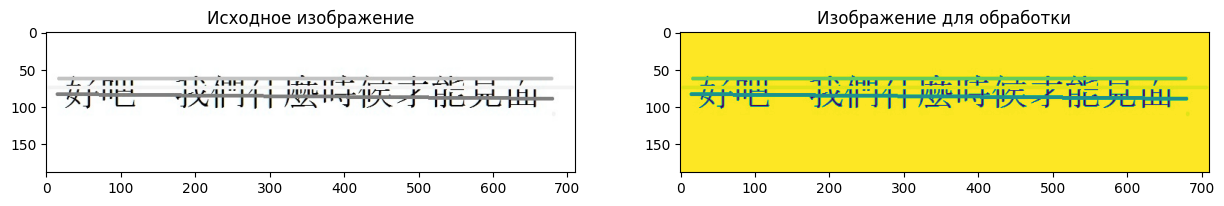

In [17]:
image1 = cv.imread('images/chinieze_text.jpeg')
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(15, 7))

plt.subplot(gs[0])
plt.imshow(image1)
plt.title('Исходное изображение')
plt.subplot(gs[1])
plt.imshow(gray_image1)
plt.title('Изображение для обработки')

## Выделение границ. Операторы Робертса и Собеля

Операторы Робертса и Собеля реализуются путем свертки изображения со следующими ядрами:

- Оператор Робертса:
$
M_1 =
 \begin{pmatrix}
  1 & 0 \\
  0 & -1
 \end{pmatrix}
;
M_2 =
 \begin{pmatrix}
  0 & -1\\
  1 & 0
 \end{pmatrix}
.
$

- Оператор Собеля:
$
M_x =
\begin{pmatrix}
 1 & 0 & -1 \\
 2 & 0 & -2 \\
 1 & 0 & -1
 \end{pmatrix}
;
M_y =
\begin{pmatrix}
 1  & 2  & 1 \\
 0  & 0  & 0 \\
 -1 & -2 & -1
 \end{pmatrix}
.
$

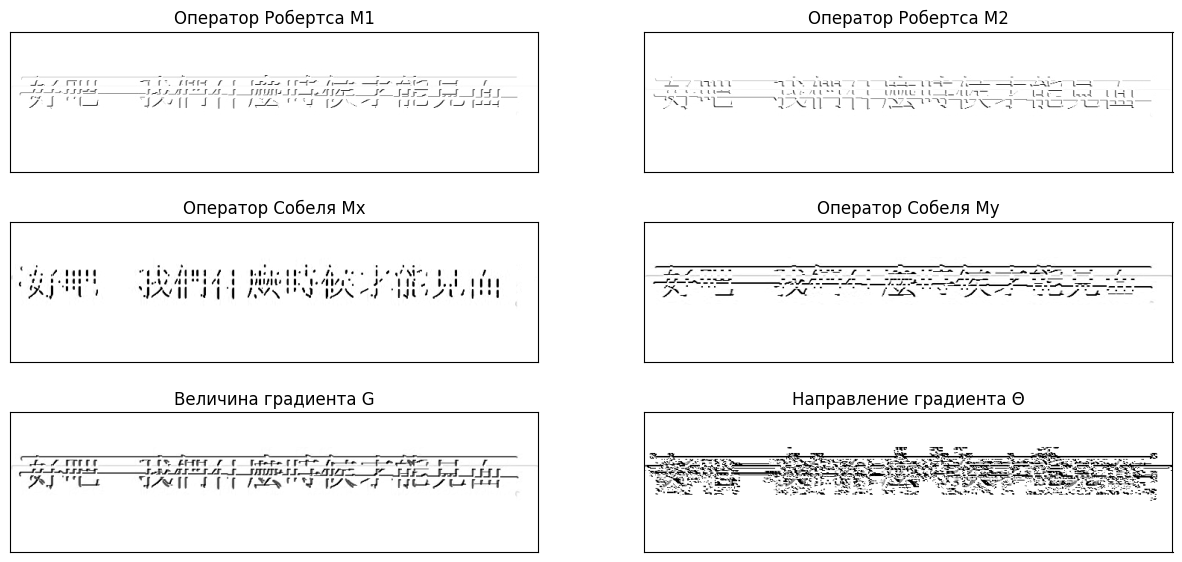

In [18]:
M1 = np.asarray([[1, 0], [0, -1]])
M2 = np.asarray([[0, -1], [1, 0]])
Mx = np.asarray([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
My = np.asarray([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

kernels = [M1, M2, Mx, My]

gs = plt.GridSpec(3, 2)
plt.figure(figsize=(15, 7))

titles = ['Оператор Робертcа M1', 'Оператор Робертcа M2', 'Оператор Собеля Mх',
          'Оператор Собеля My', 'Величина градиента G', 'Направление градиента Θ']
numberOfImage = 6
shape = gray_image1.shape
filtered_images = np.empty(shape[0] * shape[1] * numberOfImage).reshape(shape[0], shape[1], numberOfImage)

for i in np.arange(numberOfImage - 2):
    filtered_images[..., i] = cv.filter2D(gray_image1, -1, kernels[i])

filtered_images[..., 4] = np.sqrt(filtered_images[..., 2] ** 2 + filtered_images[..., 3] ** 2)
filtered_images[..., 5] = np.arctan2(filtered_images[..., 3], filtered_images[..., 2])

for i in np.arange(numberOfImage):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(filtered_images[..., i], cmap='binary')

plt.show()

Свертка изображения оператором Собеля с ядром $M_x$ является наиболее предпочтительным вариантом.
Сохраняем данное изображение в директорую images

In [21]:
cv.imwrite('images/chinieze_text_with_sobels_operator.jpeg', filtered_images[..., 2])

True

Чтение сохраненного изображения и инвертация цветов

Text(0.5, 1.0, 'Изображение для бинаризации')

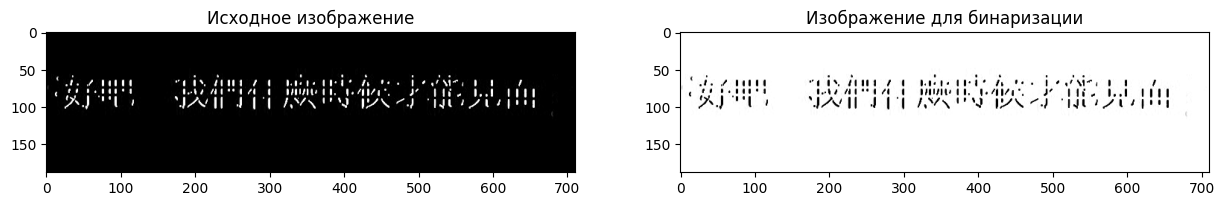

In [30]:
image1 = cv.imread('images/chinieze_text_with_sobels_operator.jpeg')
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
lut = lambda i: 255 - i
invert_image = lut(gray_image1)

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(15, 7))

plt.subplot(gs[0])
plt.imshow(image1)
plt.title('Исходное изображение')
plt.subplot(gs[1])
plt.imshow(invert_image, cmap='gray')
plt.title('Изображение для бинаризации')

## Бинаризация полутоновых изображений (пороговая фильтрация).

Бинаризация полутоновых изображений осуществляется следующим образом: для каждого пикселя применяется одно и то же пороговое значение. Если значение пикселя меньше порогового значения, оно имеет значение 0, в противном случае — максимальное значение. В библиотеке OpenCV есть функция для бинаризации изображений cv.threshold(), для применения пороговых значений. Функция принимает несколько параметров:
- image - изображение, к которому применяется бинаризация;
- threshold - пороговое значение;
- maxval - максимальное значение, которое присваивается значениям пикселей, превышающим пороговое значение;
- type - тип порога.

OpenCV предоставляет различные типы пороговых значений:
- cv.THRESH_BINARY
$$
\begin{equation*}
out(x, y) =
 \begin{cases}
   maxval \; &\textit{if image(x, y) > threshold } \\
   0 \; &\textit{иначе}
 \end{cases}
\end{equation*}
$$
- cv.THRESH_BINARY_INV
$$
\begin{equation*}
out(x, y) =
 \begin{cases}
   0 \; &\textit{if image(x, y) > threshold } \\
   maxval \; &\textit{иначе}
 \end{cases}
\end{equation*}
$$
- cv.THRESH_TRUNC
$$
\begin{equation*}
out(x, y) =
 \begin{cases}
   threshold \; &\textit{if image(x, y) > threshold } \\
   image(x,y) \; &\textit{иначе}
 \end{cases}
\end{equation*}
$$
- cv.THRESH_TOZERO
$$
\begin{equation*}
out(x, y) =
 \begin{cases}
   image(x, y) \; &\textit{if image(x, y) > threshold } \\
   0 \; &\textit{иначе}
 \end{cases}
\end{equation*}
$$
- cv.THRESH_TOZERO_INV
$$
\begin{equation*}
out(x, y) =
 \begin{cases}
   0 \; &\textit{if image(x, y) > threshold } \\
   image(x, y) \; &\textit{иначе}
 \end{cases}
\end{equation*}
$$

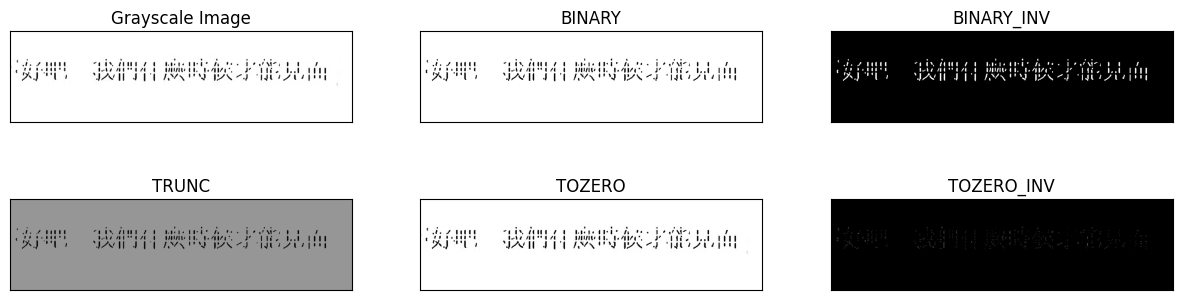

In [35]:
image = invert_image
threshold = 150

ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(image, threshold, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO_INV)
titles = ['Grayscale Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
gs = plt.GridSpec(3, 2)
plt.figure(figsize=(15, 4))
for i in np.arange(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Целевыми результатами для осуществления перевода через Google Translate являются изображения с типами BINARY и BINARY_INV.
Ниже представлены варианты перевода по данным картинкам

Text(0.5, 1.0, 'Перевод инверсной бинаризации')

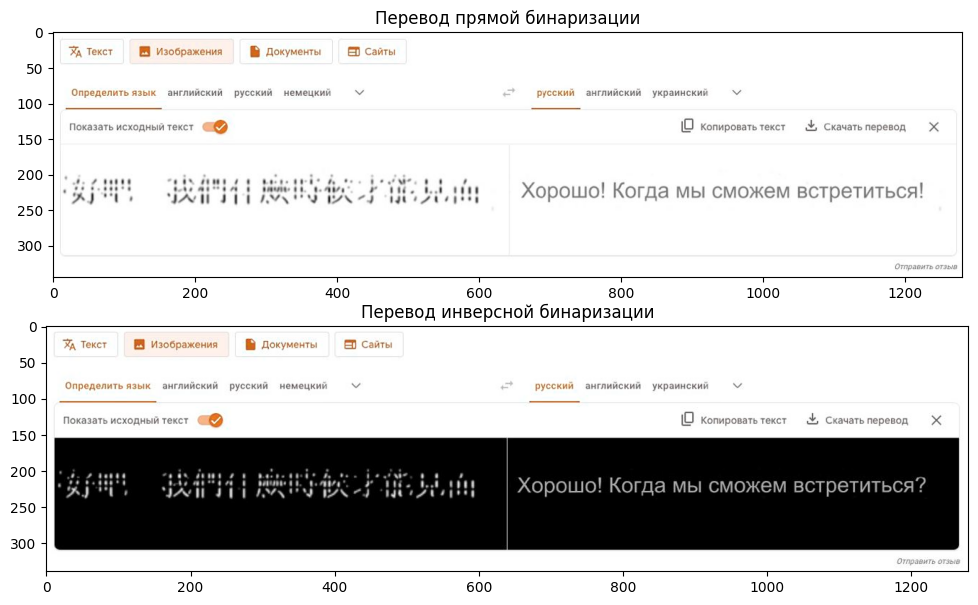

In [39]:
result_binary = cv.imread('images/result_binary.jpg')
result_binary_inv = cv.imread('images/result_binary_inv.jpg')

gs = plt.GridSpec(2, 1)
plt.figure(figsize=(15, 7))

plt.subplot(gs[0])
plt.imshow(result_binary)
plt.title('Перевод прямой бинаризации')
plt.subplot(gs[1])
plt.imshow(result_binary_inv, cmap='gray')
plt.title('Перевод инверсной бинаризации')